# 1. Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

import warnings
warnings.filterwarnings('ignore')

np.random.seed(12345)

# 2. Read Data

In [2]:
data = pd.read_csv('bike_sharing_dataset.csv')

data

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,days_since_2011,cnt
0,SPRING,2011,JAN,NO HOLIDAY,SAT,NO WORKING DAY,MISTY,8.175849,80.5833,10.749882,0,985
1,SPRING,2011,JAN,NO HOLIDAY,SUN,NO WORKING DAY,MISTY,9.083466,69.6087,16.652113,1,801
2,SPRING,2011,JAN,NO HOLIDAY,MON,WORKING DAY,GOOD,1.229108,43.7273,16.636703,2,1349
3,SPRING,2011,JAN,NO HOLIDAY,TUE,WORKING DAY,GOOD,1.400000,59.0435,10.739832,3,1562
4,SPRING,2011,JAN,NO HOLIDAY,WED,WORKING DAY,GOOD,2.666979,43.6957,12.522300,4,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
726,SPRING,2012,DEZ,NO HOLIDAY,THU,WORKING DAY,MISTY,3.945849,65.2917,23.458911,726,2114
727,SPRING,2012,DEZ,NO HOLIDAY,FRI,WORKING DAY,MISTY,3.906651,59.0000,10.416557,727,3095
728,SPRING,2012,DEZ,NO HOLIDAY,SAT,NO WORKING DAY,MISTY,3.906651,75.2917,8.333661,728,1341
729,SPRING,2012,DEZ,NO HOLIDAY,SUN,NO WORKING DAY,GOOD,4.024151,48.3333,23.500518,729,1796


In [3]:
data.drop(['days_since_2011'], axis=1, inplace=True)

data

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,SPRING,2011,JAN,NO HOLIDAY,SAT,NO WORKING DAY,MISTY,8.175849,80.5833,10.749882,985
1,SPRING,2011,JAN,NO HOLIDAY,SUN,NO WORKING DAY,MISTY,9.083466,69.6087,16.652113,801
2,SPRING,2011,JAN,NO HOLIDAY,MON,WORKING DAY,GOOD,1.229108,43.7273,16.636703,1349
3,SPRING,2011,JAN,NO HOLIDAY,TUE,WORKING DAY,GOOD,1.400000,59.0435,10.739832,1562
4,SPRING,2011,JAN,NO HOLIDAY,WED,WORKING DAY,GOOD,2.666979,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...
726,SPRING,2012,DEZ,NO HOLIDAY,THU,WORKING DAY,MISTY,3.945849,65.2917,23.458911,2114
727,SPRING,2012,DEZ,NO HOLIDAY,FRI,WORKING DAY,MISTY,3.906651,59.0000,10.416557,3095
728,SPRING,2012,DEZ,NO HOLIDAY,SAT,NO WORKING DAY,MISTY,3.906651,75.2917,8.333661,1341
729,SPRING,2012,DEZ,NO HOLIDAY,SUN,NO WORKING DAY,GOOD,4.024151,48.3333,23.500518,1796


# 3. Clean Data

## 3.1. Handle Missing Values

### 3.1.1. Check Missing Values

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      731 non-null    object 
 1   yr          731 non-null    int64  
 2   mnth        731 non-null    object 
 3   holiday     731 non-null    object 
 4   weekday     731 non-null    object 
 5   workingday  731 non-null    object 
 6   weathersit  731 non-null    object 
 7   temp        731 non-null    float64
 8   hum         731 non-null    float64
 9   windspeed   731 non-null    float64
 10  cnt         731 non-null    int64  
dtypes: float64(3), int64(2), object(6)
memory usage: 62.9+ KB


### 3.1.2. Remove Missing Values (Listwise Deletion)

In [5]:
# no NaN to remove
# data.dropna(axis=0, inplace=True)

## 3.2. Handle Outliers

### 3.2.1. Check Outliers

In [6]:
data.describe()

,yr,temp,hum,windspeed,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2011.500684,15.283085,62.789406,12.762576,4504.348837
std,0.500342,8.603397,14.242910,5.192357,1937.211452
min,2011.000000,-5.220871,0.000000,1.500244,22.000000
25%,2011.000000,7.842925,52.000000,9.041650,3152.000000
50%,2012.000000,15.421651,62.666700,12.125325,4548.000000
75%,2012.000000,22.804575,73.020850,15.625371,5956.000000
max,2012.000000,32.498349,97.250000,34.000021,8714.000000


### 3.2.2. Remove Outliers

In [7]:
# no outlier to remove

# 4. Split Dataset into Training & Test Set

In [8]:
target_name = 'cnt'
feature_name = list(data.columns.drop(target_name))

In [9]:
X = data[feature_name]
y = data[target_name]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [11]:
X_test

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed
584,FALL,2012,AUG,NO HOLIDAY,TUE,WORKING DAY,MISTY,26.584151,70.3750,7.832836
585,FALL,2012,AUG,NO HOLIDAY,WED,WORKING DAY,MISTY,27.250000,67.2917,7.416900
586,FALL,2012,AUG,NO HOLIDAY,THU,WORKING DAY,GOOD,27.524151,62.0417,10.458700
587,FALL,2012,AUG,NO HOLIDAY,FRI,WORKING DAY,MISTY,25.644151,71.5833,16.000471
588,FALL,2012,AUG,NO HOLIDAY,SAT,NO WORKING DAY,MISTY,24.547500,73.2917,13.834093
...,...,...,...,...,...,...,...,...,...,...
726,SPRING,2012,DEZ,NO HOLIDAY,THU,WORKING DAY,MISTY,3.945849,65.2917,23.458911
727,SPRING,2012,DEZ,NO HOLIDAY,FRI,WORKING DAY,MISTY,3.906651,59.0000,10.416557
728,SPRING,2012,DEZ,NO HOLIDAY,SAT,NO WORKING DAY,MISTY,3.906651,75.2917,8.333661
729,SPRING,2012,DEZ,NO HOLIDAY,SUN,NO WORKING DAY,GOOD,4.024151,48.3333,23.500518


# 5. Data Preparation

In [12]:
numerical_feature = ['yr', 'temp', 'hum', 'windspeed']
categorical_feature = [f for f in feature_name if f not in numerical_feature]

In [13]:
print('numerical_feature :', numerical_feature)
print('categorical feature :', categorical_feature)

numerical_feature : ['yr', 'temp', 'hum', 'windspeed']
categorical feature : ['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']


In [14]:
for feature in categorical_feature:
    print(feature, ':', np.unique(X_train[feature]))

season : ['FALL' 'SPRING' 'SUMMER' 'WINTER']
mnth : ['APR' 'AUG' 'DEZ' 'FEB' 'JAN' 'JUL' 'JUN' 'MAR' 'MAY' 'NOV' 'OKT' 'SEP']
holiday : ['HOLIDAY' 'NO HOLIDAY']
weekday : ['FRI' 'MON' 'SAT' 'SUN' 'THU' 'TUE' 'WED']
workingday : ['NO WORKING DAY' 'WORKING DAY']
weathersit : ['GOOD' 'MISTY' 'RAIN/SNOW/STORM']


In [15]:
ordinal_feature = []
nominal_feature = list(categorical_feature)

## ### 5.1 Ordinal Encoding

## 5.2. One Hot Encoding

### 5.2.1. Traning Set

In [16]:
one_hot_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
one_hot_encoder.fit(X_train[nominal_feature])

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [17]:
one_hot_feature = []
for i, feature in enumerate(nominal_feature):
    for cate in one_hot_encoder.categories_[i]:
        one_hot_feature_name = str(feature) + '_' + str(cate)
        one_hot_feature.append(one_hot_feature_name)

In [18]:
X_train[one_hot_feature] = one_hot_encoder.transform(X_train[nominal_feature])
X_train.drop(nominal_feature, axis=1, inplace=True)

### 5.2.2. Test Set

In [19]:
X_test[one_hot_feature] = one_hot_encoder.transform(X_test[nominal_feature])
X_test.drop(nominal_feature, axis=1, inplace=True)

In [20]:
X_test

,yr,temp,hum,windspeed,season_FALL,season_SPRING,season_SUMMER,season_WINTER,mnth_APR,mnth_AUG,...,weekday_SAT,weekday_SUN,weekday_THU,weekday_TUE,weekday_WED,workingday_NO WORKING DAY,workingday_WORKING DAY,weathersit_GOOD,weathersit_MISTY,weathersit_RAIN/SNOW/STORM
584,2012,26.584151,70.3750,7.832836,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
585,2012,27.250000,67.2917,7.416900,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
586,2012,27.524151,62.0417,10.458700,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
587,2012,25.644151,71.5833,16.000471,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
588,2012,24.547500,73.2917,13.834093,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,2012,3.945849,65.2917,23.458911,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
727,2012,3.906651,59.0000,10.416557,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
728,2012,3.906651,75.2917,8.333661,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
729,2012,4.024151,48.3333,23.500518,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


# 6. Model Creation

In [21]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [22]:
reg.intercept_

-4099996.0319268624

In [23]:
reg.coef_

array([ 2040.22229976,    79.45617424,   -12.76451272,   -39.52720211,
         -20.1283717 ,  -568.5209062 ,   139.73545705,   448.91382086,
          21.61259325,   123.33665584,  -110.91430212,  -591.04178429,
        -788.05519707,   -76.72810913,   294.15655046,   -56.09478339,
         375.7743012 ,   -44.2937218 ,   331.30995502,   520.93784202,
        -137.4022848 ,   137.4022848 ,    48.57767076,  -121.71309124,
         181.67415276,  -107.44932276,    30.62191571,     6.2764273 ,
         -37.98775252,   -63.17745481,    63.17745481,   711.00617416,
         317.17967892, -1028.18585307])

# 7. Prediction

## 7.1. Training Set

In [24]:
y_pred_train = reg.predict(X_train)

## 7.2. Test Set

In [25]:
y_pred_test = reg.predict(X_test)

# 8. Model Evaluation

## 8.1. Training Set

### 8.1.1. Scoring

In [26]:
print('r2_score =\t\t\t', r2_score(y_train, y_pred_train))
print('mean_squared_error =\t\t', mean_squared_error(y_train, y_pred_train))
print('mean_absolute_error =\t\t', mean_absolute_error(y_train, y_pred_train))
print('mean_absolute_percentage_error =', mean_absolute_percentage_error(y_train, y_pred_train))

r2_score =			 0.8551730633818542
mean_squared_error =		 462669.7944138038
mean_absolute_error =		 508.04548162764434
mean_absolute_percentage_error = 0.16705413471091163


### 8.1.2. Scatter Plot between Predicted & Actual Values

Text(0, 0.5, 'Actual')

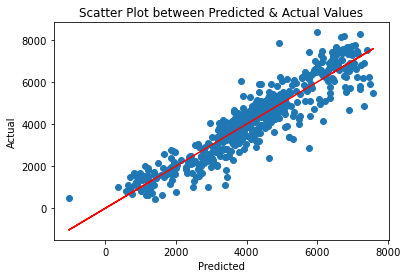

In [27]:
plt.scatter(y_pred_train, y_train)

plt.plot(y_pred_train, y_pred_train, color='red')

plt.title('Scatter Plot between Predicted & Actual Values')
plt.xlabel('Predicted')
plt.ylabel('Actual')

## 8.2. Test Set

### 8.2.1. Scoring

In [28]:
print('r2_score =\t\t\t', r2_score(y_test, y_pred_test))
print('mean_squared_error =\t\t', mean_squared_error(y_test, y_pred_test))
print('mean_absolute_error =\t\t', mean_absolute_error(y_test, y_pred_test))
print('mean_absolute_percentage_error =', mean_absolute_percentage_error(y_test, y_pred_test))

r2_score =			 0.6533833320855608
mean_squared_error =		 1218080.5473417854
mean_absolute_error =		 804.4610955226996
mean_absolute_percentage_error = 1.381568969623127


### 8.2.2. Scatter Plot between Predicted & Actual Values

Text(0, 0.5, 'Actual')

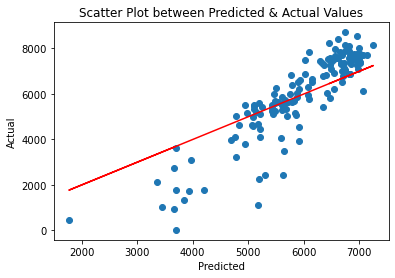

In [29]:
plt.scatter(y_pred_test, y_test)

plt.plot(y_pred_test, y_pred_test, color='red')

plt.title('Scatter Plot between Predicted & Actual Values')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# 9. Save Model

In [30]:
import pickle

In [31]:
pickle.dump((reg, 
             one_hot_encoder, 
             feature_name, 
             numerical_feature, 
             ordinal_feature, 
             nominal_feature), 
            open('bike_sharing_model.pickle', 'wb'))